In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class

In [2]:
font = {'size'   : 20, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'

False
1.75952705386 4.88757514961
False
0.0495563747685 0.13765659678
False
-0.118074430152 -0.3279845282
False
-0.0875192955436 -0.243109154288
False
-0.0496136366298 -0.137815657305
False
-0.0244919454205 -0.0680331817236
False
-0.0104233642208 -0.0289537895023
False
-0.00329914618774 -0.00916429496594
False
-5.58863747813e-05 -0.000155239929948


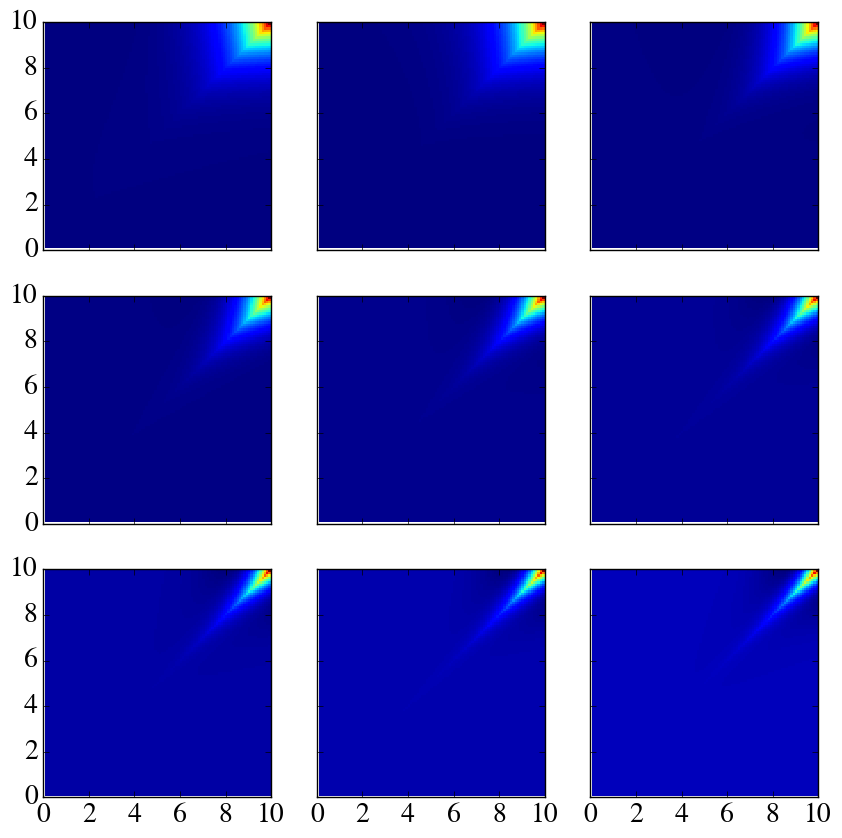

In [3]:
q = np.linspace(0.1,10,100)
#q = np.array([0.01+i*0.07 for i in range(201)])
#print q

lmax = 10
cosmo = Class()
Z = cosmo.compute_Zl_massive(q,lmax)

f, axes = plt.subplots(3,3,sharex=True,sharey=True,figsize=(10,10))
[Q, Qpr] = np.meshgrid(q,q)
l = 0
for i in range(3):
    for j in range(3):
        ax = axes[i][j]
        arr = Z[l].T*np.exp(Q)
        ax.pcolormesh(q,q,Z[l].T*np.exp(Q))
        print np.allclose(arr.T, arr)
        print arr[2,4],arr[4,2]
        l = l+1

In [8]:
import scipy
import scipy.linalg as la
def inu_dist(q):
    return np.exp(-q)

def weights(q):
    f0 = inu_dist(q)
    dq = q[1]-q[0]
    w = f0*dq
    w[0] = w[0]*0.5
    w[-1] = w[-1]*0.5
    return w
    
Nq =24.
q = np.linspace(0.1,24.,Nq)
lmax =10
cosmo = Class()
Z = cosmo.compute_Zl_massive(q,lmax)

C3term = -40./3*np.diag(q)
f0invmat = np.diag(1./inu_dist(q))
wmat = np.diag(weights(q))

for l in range(lmax+1):
    Zterm = np.dot(f0invmat,np.dot(Z[l],wmat))

    fullmat = C3term+Zterm
    L = la.eig(fullmat,right=False)
    print 'Eigenvalues, l='+str(l)+':',L[np.real(L)>0]
    #print 'Imaginarity, l='+str(l)+':',np.imag(L)/np.real(L)



Eigenvalues, l=0: [ 2.93070086+0.j  2.86922275+0.j]
Eigenvalues, l=1: [ 2.84542374+0.j]
Eigenvalues, l=2: []
Eigenvalues, l=3: []
Eigenvalues, l=4: []
Eigenvalues, l=5: []
Eigenvalues, l=6: []
Eigenvalues, l=7: []
Eigenvalues, l=8: []
Eigenvalues, l=9: []
Eigenvalues, l=10: []


In [9]:
for l in range(2):
    Zterm = np.dot(f0invmat,np.dot(Z[l],wmat))

    fullmat = C3term+Zterm
    L = la.eig(fullmat,right=False)
    print 'Eigenvalues, l='+str(l)+':',L[:25]
    print 'maximal eigenvalue, l='+str(l)+':', max(L)
    index = np.argwhere(L==max(L))
    L = np.delete(L,index)
    print '2. maximal eigenvalue, l='+str(l)+':',max(L)
    index = np.argwhere(L==max(L))
    L = np.delete(L,index)
    print '3. maximal eigenvalue, l='+str(l)+':',max(L)

Eigenvalues, l=0: [-308.78900695+0.j -285.32195615+0.j -267.54721199+0.j   -0.77984602+0.j
    2.93070086+0.j    2.86922275+0.j   -8.52813967+0.j -251.06289462+0.j
  -21.79939083+0.j -235.30278305+0.j -220.03962605+0.j  -35.72559440+0.j
 -205.14764984+0.j  -49.74644226+0.j -190.54116740+0.j  -63.77098175+0.j
 -176.15256448+0.j  -77.78138017+0.j -161.92429131+0.j  -91.77731327+0.j
 -147.80711709+0.j -105.76476327+0.j -119.75406316+0.j -133.76070919+0.j]
maximal eigenvalue, l=0: (2.93070086439+0j)
2. maximal eigenvalue, l=0: (2.86922275076+0j)
3. maximal eigenvalue, l=0: (-0.77984601505+0j)
Eigenvalues, l=1: [-308.88006873+0.j -285.44986835+0.j -267.74228603+0.j   -1.11197595+0.j
    2.84542374+0.j  -10.27657800+0.j -251.33827136+0.j  -19.74626221+0.j
 -235.67270369+0.j  -29.86642898+0.j  -41.52675369+0.j -220.51912860+0.j
  -54.15205490+0.j  -67.25703709+0.j -205.75186815+0.j  -80.62037679+0.j
  -94.13799498+0.j -191.28464060+0.j -107.75748611+0.j -177.04913304+0.j
 -121.45328051+0.j -1

In [23]:

D1 = np.diag(np.diagonal(np.random.rand(3,3)))
A2 = np.random.rand(3,3)
D2 = np.diag(np.diagonal(np.random.rand(3,3)))

print np.dot(D1,np.dot(A2,D2))
print np.dot(A2.T,np.dot(D1,D2))


[[ 0.01020533  0.11475939  0.16715954]
 [ 0.08372453  0.83044655  0.04696512]
 [ 0.08657975  0.53497669  0.22279731]]
[[ 0.01020533  0.66904326  0.27637142]
 [ 0.01436107  0.83044655  0.21370278]
 [ 0.0523666   0.11757097  0.22279731]]


In [18]:
A=np.random.rand(3,3)
np.diag(np.diagonal(A))

array([[ 0.85550211,  0.        ,  0.        ],
       [ 0.        ,  0.44563272,  0.        ],
       [ 0.        ,  0.        ,  0.58516463]])